In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
# Read the CSV file
df = pd.read_csv('C:/xampp/htdocs/git/MobilePhonePricePrediction/Data/Raw/Cellphone.csv')
df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [47]:
# Dropping the 'Product_id' column as it is not needed for analysis
df.drop(columns=['Product_id'], inplace=True)
df.drop(columns=['Sale'], inplace=True)


In [48]:
df.head()

,Price,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [49]:
# Renaming the 'resoloution' column to 'resolution' for consistency
df.rename(columns={'resoloution': 'resolution'}, inplace=True)

df.rename(columns={'RearCam': 'Rear_Cam'}, inplace=True)


In [50]:
df.head()

,Price,weight,resolution,ppi,cpu core,cpu freq,internal mem,ram,Rear_Cam,Front_Cam,battery,thickness
0,2357,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [51]:
# Convert all column names to snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df.head()


,price,weight,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,thickness
0,2357,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,1916,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,1315,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,1749,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [52]:
# Checking null values
print(df.isnull().sum())


price           0
weight          0
resolution      0
ppi             0
cpu_core        0
cpu_freq        0
internal_mem    0
ram             0
rear_cam        0
front_cam       0
battery         0
thickness       0
dtype: int64


In [53]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


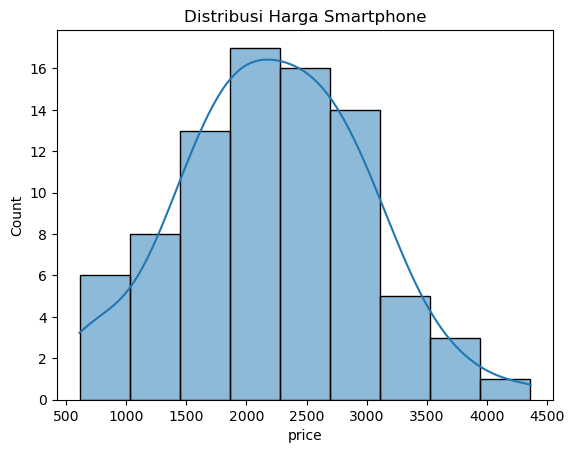

In [54]:
# plotting the distribution of smartphone prices
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Smartphone')
plt.show()

In [55]:
# Categorizing the 'price' column into 'Low', 'Mid', and 'High' categories
def price_category(price):
    if price < 1700:
        return 'Low'
    elif price < 2700:
        return 'Mid'
    else:
        return 'High'

df['price_range'] = df['price'].apply(price_category)

df['price_range'].value_counts()


price_range
Mid     41
High    23
Low     19
Name: count, dtype: int64

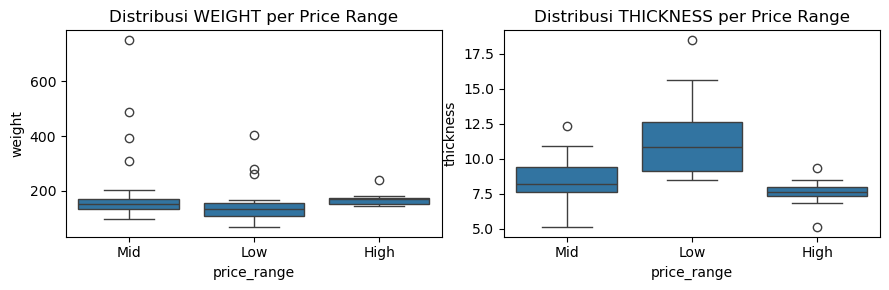

In [56]:
# Visualisation of weight and thickness by price range
fig, axes = plt.subplots(1, 2, figsize=(9, 3))

sns.boxplot(x='price_range', y='weight', data=df, ax=axes[0])
axes[0].set_title('Distribusi WEIGHT per Price Range')

sns.boxplot(x='price_range', y='thickness', data=df, ax=axes[1])
axes[1].set_title('Distribusi THICKNESS per Price Range')

plt.tight_layout()
plt.show()


In [57]:
# Because weight and thickness are not that relevant, we can drop them
df.drop(columns=['weight', 'thickness'], inplace=True)
df.head()

,price,resolution,ppi,cpu_core,cpu_freq,internal_mem,ram,rear_cam,front_cam,battery,price_range
0,2357,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,Mid
1,1749,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,Mid
2,1916,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,Mid
3,1315,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,Low
5,2137,5.5,401,4,2.30,16.0,2.000,16.00,8.0,2500,Mid


In [58]:

# Convert cleaned data to CSV
df.to_csv('C:/xampp/htdocs/git/MobilePhonePricePrediction/Data/Clean/cleaned_cellphone.csv', index=False)